In [ ]:
!unzip /content/dataset02.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/cloudy/train_23566.jpg  
  inflating: data/cloudy/train_23598.jpg  
  inflating: data/cloudy/train_23608.jpg  
  inflating: data/cloudy/train_23634.jpg  
  inflating: data/cloudy/train_23636.jpg  
  inflating: data/cloudy/train_23646.jpg  
  inflating: data/cloudy/train_2366.jpg  
  inflating: data/cloudy/train_23664.jpg  
  inflating: data/cloudy/train_23706.jpg  
  inflating: data/cloudy/train_2380.jpg  
  inflating: data/cloudy/train_23805.jpg  
  inflating: data/cloudy/train_23806.jpg  
  inflating: data/cloudy/train_23826.jpg  
  inflating: data/cloudy/train_23843.jpg  
  inflating: data/cloudy/train_23877.jpg  
  inflating: data/cloudy/train_23884.jpg  
  inflating: data/cloudy/train_23953.jpg  
  inflating: data/cloudy/train_2396.jpg  
  inflating: data/cloudy/train_23978.jpg  
  inflating: data/cloudy/train_23979.jpg  
  inflating: data/cloudy/train_23980.jpg  
  inflating: data/cloudy/train_23981.jpg  
  infl

Imported libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
import tensorflow 
from keras.models import Sequential 
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

from IPython import display 
display.set_matplotlib_formats('svg')
from keras.applications.vgg19 import VGG19
from keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input


The listdir() function is a function provided by the os module, and by using this function, we can print a list of names of all the files present in the specified path.

In [ ]:
os.listdir("/content/data")

['desert', 'water', 'green_area', 'cloudy']

count the number of files in a directory

In [ ]:
print(len(os.listdir("/content/data/cloudy")))
print(len(os.listdir("/content/data/desert")))
print(len(os.listdir("/content/data/green_area")))
print(len(os.listdir("/content/data/water")))

1500
1131
1500
1500


using `bar plot` to visualizing the number of images of each class. Here we can see how many image we has in each class. And, whose values are greater and whose less for better understating.

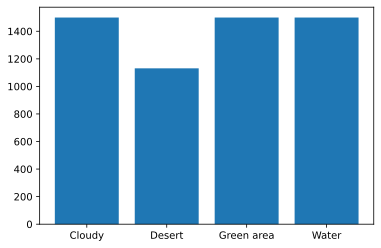

In [ ]:
x=['Cloudy','Desert','Green area','Water']
y=[1500,1131,1500,1500]
plt.bar(x,y);

In [ ]:
train = IDG(rescale=1./255,
                   fill_mode='nearest',
                   featurewise_center=True,
                   validation_split=0.2,
                   horizontal_flip=True,
                   shear_range=0.3,
                   zoom_range=0.25,
                   brightness_range=(0.4,0.7),
                   rotation_range=15,
                   featurewise_std_normalization=True,
                   )

`Batch size` is the number of training examples in one epoch (the higher the batch size, the more memory we’ll need)

`target size` is the size of image
Height & Width: Pixel dimensions of image



Depth: Red, Green or Blue (3), or Black & White (1)


In [ ]:
train_generator= train.flow_from_directory('/content/data',
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='binary',
                                                  subset='training')

Found 4505 images belonging to 4 classes.


Apply the function to your training & validation datasets so it extracts the features and labels from all of them.

In [ ]:
test_generator= train.flow_from_directory('/content/data',
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='binary',
                                                  subset='validation')

Found 1126 images belonging to 4 classes.


Found 5631 files belonging to 4 classes.


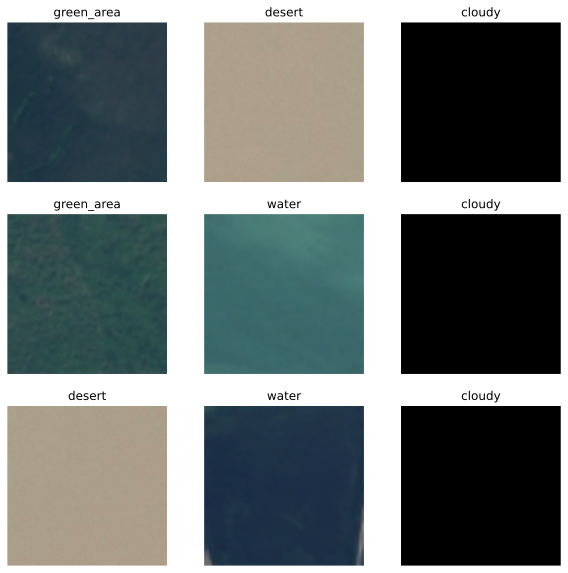

In [ ]:
train_data = image_dataset_from_directory('/content/data',
                                             shuffle=True,
                                             batch_size=32,image_size=(224,224))
class_name =  train_data.class_names
plt.figure(figsize = (10,10))
for image , label in train_data.take(1):
    for i in range(9) :
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_name[label[i]])
        plt.axis("off")

`VGG19` is an advanced CNN with pre-trained layers and a great understanding of what defines an image in terms of shape, color, and structure. VGG19 is very deep and has been trained on millions of diverse images with complex classification tasks.

In [ ]:
vgg_model = VGG19(include_top=True,weights='imagenet')

for layer in vgg_model.layers:
    layer.trainable=False

574710816/574710816 [==============================] - 19s 0us/step


Building the sequential model and adding layers in it.

`Sequential model` means each layer has exactly one input and output and is stacked together to form the entire network.

`Activation functions` introduce non-linearity to the model which allows it to learn complex functional mappings between the inputs and response variables. There are quite a few different activation functions like sigmoid, tanh, RelU, Leaky RelU, etc.


`RelU` function is a piecewise linear function that outputs the input directly if is positive i.e. > 0, otherwise, it will output zero. RelU activation function is applied right after a convolution layer and then that output is max pooled.

`Softmax Function`, is to test the reliability of the model using as Loss Function the Cross Entropy Function, in order to maximize the performance of our neural network.

In [ ]:
vgg_model = keras.Model(inputs=vgg_model.input,outputs=vgg_model.layers[-2].output)
model= keras.Sequential()

for layer in vgg_model.layers:
    model.add(layer)
    
model.add(Dense(128, activation='relu'))
model.add(Dense(8,activation='softmax'))

`Sparse_categorical_crossentropy loss` Image result for sparse_categorical_crossentropy in vgg19
sparse_categorical_crossentropy: Used as a loss function for multi-class classification model where the output label is assigned integer value (0, 1, 2, 3…).


`Adam Optimizer` can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data


`Accuracy metric` is generally describes how the model performs across all classes. It is useful when all classes are of equal importance. It is calculated as the ratio between the number of correct predictions to the total number of predictions.

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

training the model for 100 epoch

In [ ]:
History = model.fit(train_generator,
    validation_data = test_generator, 
    # callbacks = [early],
    epochs = 100)

/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1671: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
141/141 [==============================] - 96s 610ms/step - loss: 1.4165 - accuracy: 0.3139 - val_loss: 1.3420 - val_accuracy: 0.3339
Epoch 2/100
141/141 [==============================] - 87s 616ms/step - loss: 1.2639 - accuracy: 0.4246 - val_loss: 1.2046 - val_accuracy: 0.5169
Epoch 3/100
141/141 [==============================] - 84s 599ms/step - loss: 1.1650 - accuracy: 0.5034 - val_loss: 1.1111 - val_accuracy: 0.6892
Epoch 4/100
141/141 [==============================] - 83s 587ms/step - loss: 1.0645 - accuracy: 0.5905 - val_loss: 1.0300 - val_accuracy: 0.5302
Epoch 5/100
141/141 [==============================] - 81s 577ms/step - loss: 0.9762 - accuracy: 0.6191 - val_loss: 0.9125 - val_accuracy: 0.6989
Epoch 6/100
141/141 [==============================] - 84s 598ms/step - loss: 0.8675 - accuracy: 0.6915 - val_loss: 0.8228 - val_accuracy: 0.7620
Epoch 7/100
141/141 [==============================] - 81s 578ms/step - loss: 0.7926 - accuracy: 0.7196 - val_loss: 0.7519 -

In [ ]:
# early = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [ ]:
print(History.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


visualizing how well our model learned using accuracy metrics, print our training history. As you can see, with each epoch (or iteration), our accuracy increase and loss decreased.

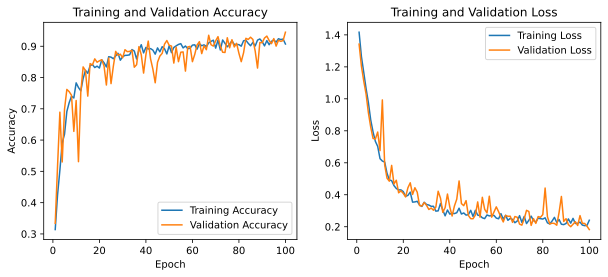

In [ ]:
acc = History.history['accuracy']
val_acc = History.history['val_accuracy']
loss = History.history['loss']
val_loss = History.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Evaluating the model's performance based on the `Test accuracy` and  `Test loss`.


In [ ]:
score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

36/36 [==============================] - 17s 460ms/step - loss: 0.1864 - accuracy: 0.9316
Test loss: 0.1864149421453476
Test accuracy: 0.9316163659095764
